# Plot earthquake frequency and magnitude compared to channel slope

In [8]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook

Read in the channel slopes to a pandas dataframe

In [2]:
data_dir = '/home/bjdd72/san_andreas/SAF_only/'
river_csv = data_dir+'SAF_only_profiles_fault_dist_SO3.csv'

In [3]:
# csv with the river profiles
river_df = pd.read_csv(river_csv)
#remove negative channel slopes
river_df = river_df[river_df['slope'] > 0]

In [4]:
print(river_df)

         basin_id        id      node  distance_from_outlet   elevation  \
0             216    630240    630240            472.956000  754.330000   
1             216    630240    629192            471.541504  754.309998   
2             216    630240    628145            470.541504  753.969971   
3             216    630240    628146            469.541504  753.500000   
4             216    630240    628147            468.541504  752.979980   
...           ...       ...       ...                   ...         ...   
5993315      9757  18221758  18155076              3.414214   19.459999   
5993316      9757  18221758  18154385              2.414214   19.430000   
5993317      9757  18221758  18154384              1.000000   19.369999   
5993318      9757  18221758  18153692              0.000000   19.330000   
5993319      9757  18221758  18152999              0.000000   19.270001   

         drainage_area  stream_order     slope   latitude   longitude  \
0                 1443    

Read in the earthquake data to a dataframe

In [9]:
eq_csv = '/home/bjdd72/san_andreas/Earthquakes/SAF_earthquakes_25km_dist_Mw.csv'
eq_df = pd.read_csv(eq_csv)

Group the earthquake dataframe into 5km intervals along fault

In [84]:
bin_width = 5
bin_array = np.arange(0, eq_df['fault_dist'].max()+bin_width, bin_width)
bins = pd.cut(eq_df['fault_dist'], bin_array, labels = bin_array[:-1])
print(bins)

0       1095.0
1        980.0
2       1040.0
3       1095.0
4       1090.0
         ...  
4059     465.0
4060     510.0
4061     945.0
4062     460.0
4063     455.0
Name: fault_dist, Length: 4064, dtype: category
Categories (220, float64): [0.0 < 5.0 < 10.0 < 15.0 ... 1080.0 < 1085.0 < 1090.0 < 1095.0]


[   2.5    7.5   12.5   17.5   22.5   27.5   32.5   37.5   42.5   47.5
   52.5   57.5   62.5   67.5   72.5   77.5   82.5   87.5   92.5   97.5
  102.5  107.5  112.5  117.5  122.5  127.5  132.5  137.5  142.5  147.5
  152.5  157.5  162.5  167.5  172.5  177.5  182.5  187.5  192.5  197.5
  202.5  207.5  212.5  217.5  222.5  227.5  232.5  237.5  242.5  247.5
  252.5  257.5  262.5  267.5  272.5  277.5  282.5  287.5  292.5  297.5
  302.5  307.5  312.5  317.5  322.5  327.5  332.5  337.5  342.5  347.5
  352.5  357.5  362.5  367.5  372.5  377.5  382.5  387.5  392.5  397.5
  402.5  407.5  412.5  417.5  422.5  427.5  432.5  437.5  442.5  447.5
  452.5  457.5  462.5  467.5  472.5  477.5  482.5  487.5  492.5  497.5
  502.5  507.5  512.5  517.5  522.5  527.5  532.5  537.5  542.5  547.5
  552.5  557.5  562.5  567.5  572.5  577.5  582.5  587.5  592.5  597.5
  602.5  607.5  612.5  617.5  622.5  627.5  632.5  637.5  642.5  647.5
  652.5  657.5  662.5  667.5  672.5  677.5  682.5  687.5  692.5  697.5
  702.

(100.0, 1100.0)

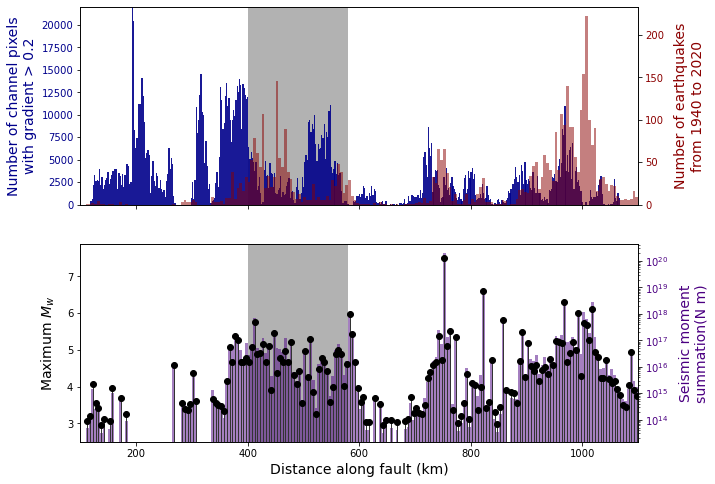

In [138]:
# set up a figure
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True, sharey=False)
ax = ax.ravel()
#ax[0].grid(color='0.8', linestyle='--', which='both')
#ax[1].grid(color='0.8', linestyle='--', which='both')

# plot the channel frequencies with gradient > 0.2 on top panel, first Y axis
steep_river_df = river_df[river_df['slope'] >= 0.2]
gr = steep_river_df.groupby(['fault_dist'])['slope'].agg(['count']).reset_index()
gr['normalized_count'] = gr['count']/gr['count'].sum()
ax[0].bar(x=gr['fault_dist'], height=gr['count'], width=2.2, facecolor='darkblue', zorder=100, alpha=0.9)
ax[0].set_ylabel('Number of channel pixels\nwith gradient > 0.2', fontsize=14, c='darkblue')
ax[0].set_ylim(0,22000)
ax[0].tick_params(axis='y', labelcolor='darkblue')

# plot the channel frequencies with gradient > 0.3
# steeper_river_df = river_df[river_df['slope'] >= 0.3]
# gr = steeper_river_df.groupby(['fault_dist'])['slope'].agg(['count']).reset_index()
# gr['normalized_count'] = gr['count']/gr['count'].sum()
# ax[0].plot(gr['fault_dist'], gr['count'], c='k', zorder=100)
# ax[0].set_ylim(0,22000)
# ax[0].tick_params(axis='y', labelcolor='darkblue')

# group the earthquake Mw data by distance along the fault
mw_df = eq_df.groupby(bins)['Mw'].agg(['count','max']).reset_index()

# plot earthquake frequencies on top panel, second Y axis
ax2 = ax[0].twinx()
mc = ma.array(mw_df['count'].values)
#mc[mask_starts] = ma.masked
ax2.bar(x=mw_df['fault_dist'], height=mc, facecolor='darkred', zorder=1, width=bin_width, alpha=0.5, align='edge')
ax2.set_ylim(0,)
ax2.set_ylabel('Number of earthquakes\nfrom 1940 to 2020', fontsize=14, c='darkred', labelpad=10)
ax2.tick_params(axis='y', labelcolor='darkred')

# plot the earthquake magnitudes on bottom panel, first Y axis
#mmax = ma.array(mw_df['max'].values)
bin_centres = bin_array[:-1]+bin_width/2
print(bin_centres)
markerline, stemlines, baseline = ax[1].stem(bin_centres, mw_df['max'], linefmt='0.2', use_line_collection=True)
markerline.set_markerfacecolor('k')
markerline.set_markeredgecolor('k')
stemlines.set_linewidth(1)
stemlines.set_zorder(4)
markerline.set_zorder(5)
ax[1].set_ylabel('Maximum $M_w$', labelpad=10, fontsize=14)
ax[1].set_ylim(2.5,)

# plot sum of seismic moments on bottom panel, second Y axis
ax3 = ax[1].twinx()
mo_df = eq_df.groupby(bins)['Mo'].agg(['sum']).reset_index()
print(mo_df['fault_dist'])
ax3.bar(x=mo_df['fault_dist'], height=mo_df['sum'], facecolor='indigo', zorder=2, width=bin_width, alpha=0.5, align='edge')
#ax3.set_ylim(1e13, 1e30)
ax3.set_yscale('log')
#ax3.invert_yaxis()
ax3.set_ylabel('Seismic moment\nsummation(N m)', fontsize=14, c='indigo', labelpad=10)
ax3.tick_params(axis='y', labelcolor='indigo')

# change zorder so that the stem lines are on top of the bar plot
ax[1].set_zorder(ax3.get_zorder()+1)
ax[1].patch.set_visible(False)

# grey bar for creeping segment
ax[0].axvspan(400, 580, facecolor='0.5', alpha=0.6)
ax3.axvspan(400, 580, facecolor='0.5', alpha=0.6, zorder=1)
ax[1].set_xlabel('Distance along fault (km)', fontsize=14)


ax[1].set_xlim(100,1100)

Save the figure

In [139]:
fig.savefig(data_dir+'SAF_only_EQ_plus_channels.png', dpi=300, transparent=False, facecolor='white')